In [1]:
#importing necessery libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
#reading dataset
df=pd.read_csv('/Users/bibekrai/tensorflow-test/Quora/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Basic EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [8]:
df.value_counts()

id      qid1    qid2    question1                                                                              question2                                                                                                                                           is_duplicate
0       1       2       What is the step by step guide to invest in share market in india?                     What is the step by step guide to invest in share market?                                                                                           0               1
269534  387254  387255  What is a good book about design?                                                      What are the best books about designing for emotion?                                                                                                0               1
269532  387250  387251  Is "A Head Full of Dreams" going to be Coldplay's last album?                          What is the song "A head full of dreams" by Coldplay about?    

In [12]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [16]:
df.shape

(404290, 6)

In [17]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [18]:
len(df)

404290

In [19]:
(df['is_duplicate'].value_counts()/len(df))*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

## Findings unique questions in dataset

In [20]:
l1=df['qid1'].tolist()

In [21]:
l2=df['qid2'].tolist()

In [22]:
len(l1+l2)

808580

In [25]:
qids=pd.Series(l1+l2)
qids

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [29]:
np.unique(qids)

array([     1,      2,      3, ..., 537931, 537932, 537933])

In [34]:
unique_qs=len(np.unique(qids))
unique_qs

537933

**Observation**\
537933 unique questions are present in the dataset.

## Finding number of unique question that appear more than one time

In [35]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [53]:
unique_question_appeared_morethen1time=np.sum(qids.value_counts()>1)
unique_question_appeared_morethen1time

111780

In [54]:
unique_question_appeared_morethen1time_occuranceprobability=(unique_question_appeared_morethen1time/unique_qs)*100
unique_question_appeared_morethen1time_occuranceprobability

20.77953945937505

**Observation**\
\
111780 unique question is appeared more than 1 time and the apperanance probabilty is 20%.

## Max number of time single question is repeated.

In [55]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [56]:
qids.value_counts().max()

157

**Observation**\
\
Question with id 2559 is reapeated 157 times which is highest number of times any unique question is repeated

## Data Visualization

**Plot Repeated and unique questions**

<BarContainer object of 2 artists>

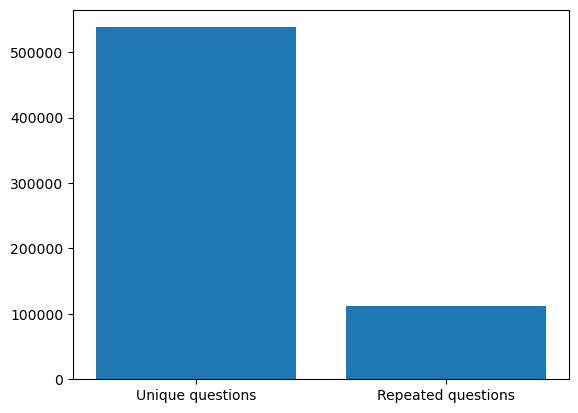

In [77]:
x=['Unique questions','Repeated questions']
y=[unique_qs,unique_question_appeared_morethen1time]
plt.bar(x,y)

## Checking for Duplicates

In [78]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [86]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
pair_duplicates

is_duplicate
qid1   qid2                
1      2                  1
3      4                  1
       282170             1
       380197             1
       488853             1
...                     ...
537924 537925             1
537926 537927             1
537928 537929             1
537930 537931             1
537932 537933             1

[404290 rows x 1 columns]